### AG News Classification

***

ORIGIN

AG is a collection of more than 1 million news articles. News articles have been gathered from more than 2000 news sources by ComeToMyHead in more than 1 year of activity. ComeToMyHead is an academic news search engine which has been running since July, 2004. The dataset is provided by the academic comunity for research purposes in data mining (clustering, classification, etc), information retrieval (ranking, search, etc), xml, data compression, data streaming, and any other non-commercial activity. For more information, please refer to the link http://www.di.unipi.it/~gulli/AG_corpus_of_news_articles.html .

DESCRIPTION

The AG's news topic classification dataset is constructed by choosing 4 largest classes from the original corpus. Each class contains 30,000 training samples and 1,900 testing samples. The total number of training samples is 120,000 and testing 7,600.

The file classes.txt contains a list of classes corresponding to each label.

The files train.csv and test.csv contain all the training samples as comma-sparated values. There are 3 columns in them, corresponding to class index (1 to 4), title and description. The title and description are escaped using double quotes ("), and any internal double quote is escaped by 2 double quotes (""). New lines are escaped by a backslash followed with an "n" character, that is "\n".

You can download the dataset from <a href = "https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset">Here</a>

### Import Necessary Libraries

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import Sequential
from keras import layers
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Read the dataset

In [25]:
df = pd.read_csv('agnews.csv')

### Save only a portion of the dataset

In [34]:
df = df[0:20000]

In [26]:
df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


### Shuffle the dataset

In [27]:
df = df.sample(frac = 1)

In [28]:
df.reset_index(drop = True, inplace = True)

In [29]:
for i in range(10):
    print(df['Description'][i],'-', df['Class Index'][i])
    print()

ABIDJAN, Ivory Coast - Ivory Coast forces will immediately pull back from front lines, the presidential spokesman said Sunday, after a day of clashes with French peacekeepers that left the West African nation #39;s air force in shreds. - 1

Los Angeles  Reuters News Service, 19 November 2004 - A generation of children grew up playing Nintendo #39;s Game Boy handheld video game system, and now that they have grown up, Nintendo has a new toy for them. - 4

Today researchers announced the discovery of a new species of ancient reptile. The 230-million-year-old remains of the long-necked, aquatic predator were found in China. - 4

(AP) PASADENA, Calif. (AP)  The Mars rover Spirit has developed a problem with one of its six wheels, but NASA officials said Tuesday they believe the robot geologist can continue working.  - 4

To modernize its venerable line of mainframe-based CICS middleware, IBM last week introduced an updated version of its CICS Transaction Server that enables IT to extend th

### Check Info

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


### View basic statistical information about the dataset

In [70]:
df.describe(include = 'all')

,Class Index,Title,Description
count,20000.000000,20000,20000
unique,NaN,19786,19944
top,NaN,SI.com,most it managers 39 question importance securi...
freq,NaN,12,3
mean,2.504200,NaN,NaN
std,1.116129,NaN,NaN
min,1.000000,NaN,NaN
25%,2.000000,NaN,NaN
50%,3.000000,NaN,NaN
75%,3.000000,NaN,NaN


### Check for missing values

In [32]:
df.isna().sum()

Class Index    0
Title          0
Description    0
dtype: int64

### Check for duplicates

In [33]:
df.duplicated().sum()

0

### Plot a countplot of the Class Index

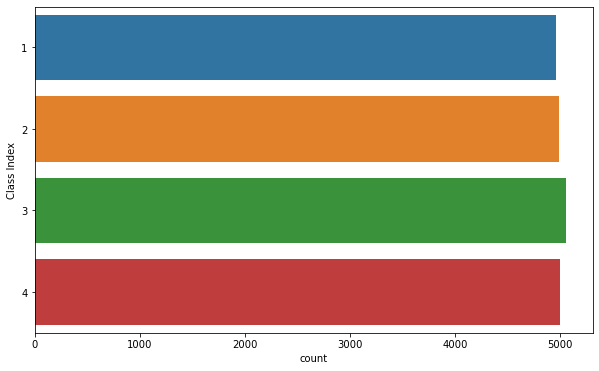

In [35]:
plt.figure(figsize = (10,6))
sns.countplot(y = df['Class Index'])
plt.show()

### Create a funciton to preprocess the text

In [37]:
def preprocess(sentence):
    #removes all the special characters and split the sentence at spaces
    text = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    
    # converts words to lowercase and removes any stopwords
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    # Lemmatize the words
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    
    # convert the list of words back into a sentence
    word = ' '.join(word)
    return word

### Apply the preprocess function to the description

In [38]:
df['Description'] = df['Description'].apply(preprocess)

In [39]:
for i in range(10):
    print(df['Description'][i],'-', df['Class Index'][i])
    print()

abidjan ivory coast ivory coast force immediately pull back front line presidential spokesman say sunday day clash french peacekeepers leave west african nation 39 air force shred - 1

los angeles reuters news service 19 november 2004 a generation children grow play nintendo 39 game boy handheld video game system grow nintendo new toy - 4

today researchers announce discovery new species ancient reptile the 230 million year old remain long neck aquatic predator find china - 4

ap pasadena calif ap the mar rover spirit develop problem one six wheel nasa officials say tuesday believe robot geologist continue work - 4

to modernize venerable line mainframe base cics middleware ibm last week introduce update version cics transaction server enable it extend product work better soas service orient architectures web service with release cics transaction server z os version 3 1 administrators integrate traditional workloads fully participate soa - 4

youth serve big way cardinals miller park t

### Split Input & Target Variables

In [40]:
X = df['Description']
y = df['Class Index']

### One Hot encode our Target Variable

In [42]:
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [43]:
labels = encoder.classes_
labels

array([1, 2, 3, 4], dtype=int64)

### Split the dataset into Training & Testing Set

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

### Create a keras Tokenizer object

In the Keras library, the Tokenizer is a class that can be used to preprocess text data. It allows you to convert a collection of text documents into a numerical representation that can be used as input to a machine learning model.

In [47]:
tokenizer = Tokenizer(num_words=5000)

### fit on text for our X

In [48]:
tokenizer.fit_on_texts(X)

In [49]:
vocab_size = len(tokenizer.word_index) + 1

### Create a function to convert text to numerical representation and add padding

In [51]:
def text_encoding(txt):
    # texts_to_sequences Transforms each text in texts to a sequence of integers.
    encoded_docs = tokenizer.texts_to_sequences(txt)
    
    # pad_sequences is used to ensure that all sequences in a list have the same length.
    padded_sequence = pad_sequences(encoded_docs, maxlen=128)    
       
    return padded_sequence

### Apply the function to our X_train & X_test

In [52]:
X_train = text_encoding(X_train)
X_test = text_encoding(X_test)

### Create keras Sequential model with GRU Layers

In [57]:
model = Sequential()
### Embedding layer
model.add(layers.Embedding(vocab_size, 128))

### GRU layer
### return_sequences: Whether to return the last output in the output sequence, or the full sequence.
model.add(layers.GRU(128,  return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.GRU(128))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(4, activation='softmax'))

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2965888   
                                                                 
 gru_2 (GRU)                 (None, None, 128)         99072     
                                                                 
 dropout_2 (Dropout)         (None, None, 128)         0         
                                                                 
 gru_3 (GRU)                 (None, 128)               99072     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                

### Compile the model

In [59]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### Train the model with our Training Set

In [60]:
model.fit(X_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10
400/400 [==============================] - 109s 243ms/step - loss: 0.6305 - accuracy: 0.7516 - val_loss: 0.3989 - val_accuracy: 0.8659
Epoch 2/10
400/400 [==============================] - 92s 229ms/step - loss: 0.2998 - accuracy: 0.8989 - val_loss: 0.3871 - val_accuracy: 0.8700
Epoch 3/10
400/400 [==============================] - 93s 233ms/step - loss: 0.2031 - accuracy: 0.9328 - val_loss: 0.4372 - val_accuracy: 0.8625
Epoch 4/10
400/400 [==============================] - 110s 276ms/step - loss: 0.1591 - accuracy: 0.9497 - val_loss: 0.4797 - val_accuracy: 0.8591
Epoch 5/10
400/400 [==============================] - 108s 270ms/step - loss: 0.1174 - accuracy: 0.9621 - val_loss: 0.5350 - val_accuracy: 0.8487
Epoch 6/10
400/400 [==============================] - 110s 276ms/step - loss: 0.0914 - accuracy: 0.9719 - val_loss: 0.6803 - val_accuracy: 0.8447
Epoch 7/10
400/400 [==============================] - 106s 266ms/step - loss: 0.0669 - accuracy: 0.9789 - val_loss: 0.7224 - v

### Make predictions with Test set

In [61]:
y_pred = model.predict(X_test)

125/125 [==============================] - 12s 55ms/step


In [62]:
y_pred = [np.argmax(i) for i in y_pred]

In [63]:
y_test = [np.argmax(i) for i in y_test]

### Check accuracy score

In [65]:
accuracy_score(y_test, y_pred)

0.8405

### Confusion matrix

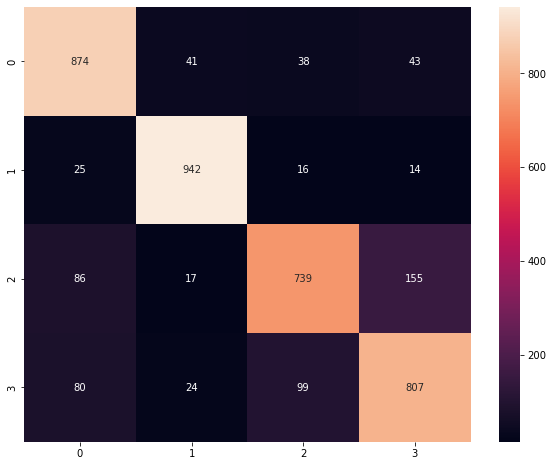

In [66]:
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.show()

### Classification Report

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       996
           1       0.92      0.94      0.93       997
           2       0.83      0.74      0.78       997
           3       0.79      0.80      0.80      1010

    accuracy                           0.84      4000
   macro avg       0.84      0.84      0.84      4000
weighted avg       0.84      0.84      0.84      4000



***